# PS 88 Lab 2: Simulation Shelling's Segregation Model

In this lab we will show how we can leverage the power of simulation to quickly and easily run algorithms like the Schelling segregation model. 

One thing that is a different about this notebook: the code here is written in the statistical software R, rather than Python. (Note in the top right corner of the notebook there is an "R" where it would say "Python" otherwise.

Like Python, R is used extremely widely in both industry and academia.

This won't make any difference from your perspective, it just means that the code we have written to run the simulation uses a different language. R and Python syntax are generally pretty similar, so knowing one helps learn the other. In fact, since all we are going to ask you to do here is call functions which are pre-written, any code you write will look exactly as it would if we programmed the algorithm in Python, with one small exepction flagged below. (There are many strong opinions about which is better for which purposes, but the short and neutral summary is that R tends to be used more by people who just need to run statistical analyses, while Python is a general programming tool.)

The first line of code here runs an R script which contains the functions to run and display the segregation algorithm.

In [1]:
# Loading up functions
source("Rschelling.R")

The main function we have written for you is called `display_schelling`. As we will see, this function can run variants of the algorithm from the lecture, but to just run that version all you need to do is run a line of code that looks like `display_schelling(init)`, where `init` is the initial arrangment of houses, entered as a string. Call the full arrangement a "city". For example, the following line of code replicates the example from class. 

In [2]:
display_schelling("ABABABAB_")

Turn,Choice,Outcome
<chr>,<chr>,<chr>
0,Start,ABABABAB_
1,the A in slot 1 stays,ABABABAB_
2,the B in slot 2 moves to 9,A_ABABABB
1,the A in slot 1 moves to 2,_AABABABB
1,empty house,_AABABABB
2,the A in slot 2 stays,_AABABABB
3,the A in slot 3 stays,_AABABABB
4,the B in slot 4 stays,_AABABABB
5,the A in slot 5 moves to 1,AAAB_BABB


The output here is a "data frame" where each line corresponds to a turn. The first column says who's turn it is (set to "0" for the initial setup), the second column says what they do, and the third column shows the resulting city arrangement.

The `display_schelling` function also has several *optional* arguments, which have a default value that you can override when you call the function. You will learn more about this soon in Data 8.

Here is one we will often make use of throughout the lab: if we want to make things a bit more concise, we can add a `shorten=TRUE` argument, which only displays the turns where someone moves.

(There is one subtle difference between R and Python syntax here: if this was Python we would write `True` rather than `TRUE`. If this bothers you, it also works to write `shorten=1` in either language.)

In [3]:
display_schelling("ABABABAB_", shorten=TRUE)

,Choice,Outcome
,<chr>,<chr>
1,Start,ABABABAB_
3,the B in slot 2 moves to 9,A_ABABABB
4,the A in slot 1 moves to 2,_AABABABB
9,the A in slot 5 moves to 1,AAAB_BABB
13,the B in slot 4 moves to 5,AAA_BBABB
20,the A in slot 7 moves to 4,AAAABB_BB
25,the B in slot 5 moves to 7,AAAA_BBBB


One of the interesting features of this model is that seemingly small changes can have a big impact on the final result. Here is what happens if, in the initial arrangement, there are alternating pairs of As and Bs rather than alternating individuals.

In [4]:
display_schelling("AABBAABB_", shorten=TRUE)

,Choice,Outcome
,<chr>,<chr>
1,Start,AABBAABB_


Hmm that looks a bit weird. Let's do the same thing but without the shorten option. One way we could do this is to just delete the `shorten=TRUE` argument, but to see another way we can do this is explicitly setting `shorten=FALSE`. The reason these do the same thing is that `shorten=FALSE` is the default setting (again, you will learn more about this in Data 8 when discussing functions), so if we don't specify whether to shorten the function will not do so.

In [5]:
display_schelling("AABBAABB_", shorten=FALSE)

Turn,Choice,Outcome
<chr>,<chr>,<chr>
0,Start,AABBAABB_
1,the A in slot 1 stays,AABBAABB_
2,the A in slot 2 stays,AABBAABB_
3,the B in slot 3 stays,AABBAABB_
4,the B in slot 4 stays,AABBAABB_
5,the A in slot 5 stays,AABBAABB_
6,the A in slot 6 stays,AABBAABB_
7,the B in slot 7 stays,AABBAABB_
8,the B in slot 8 stays,AABBAABB_


Ah, so what happened here is that, given this initial arrangment, no one wanted to move! 

**Question 1. Given the way we defined this algorithm, why does no one want to move?**

*Answer to question 1 here*

There are some additional arguments which we can change in order to capture different moving rules by the households. They are:

- `b_in` is how much the households value being close to in-group members.
- `b_out` is how much the households value dislike being close to out-group members
- `b_home` is how much the households value staying in their current home

The way the algorithm works is by computing a "utility" to each available house, where higher utility numbers mean liking the spot more (we will discuss the concept of utility quite a bit next week!). For every in-group neighbor at this potential house, we add `b_in` to this utility. For every outgroup neighbor we add `b_out` (which will typically be a negative number). If the available home is the current one, we add `b_home`. The household who is taking the current turn then goes to the available house that gives the highest utility (and goes to the leftmost one that gives the highest possible utility in the case of a tie). 

The defaults for these arguments, which replicate the rules we used in the lecture, set `b_in =1`, `b_out=0`, and `b_home=.01`. The `b_in=1` means we add 1 to the utility for each in-group member that would be a nieghbor. Any positive number could do here, since all we want to capture is that more in-group neighbors is better. The `b_out=0` captures the idea that households don't care about having out-group neighbors either way: this does not affect the utility. Another way to think of this is that people are indifferent between having an empty house or an outgroup member as a neighbor (but would rather have an ingroup neighbor!)

You can think of the `b_home=.01` as a "tie-breaking" rule: household won't move unless they can have more in-group neighbors. (The only important thing to replicate the algorithm from lecture is that `b_home` is smaller than `b_in`; if not then houses would not move even if it led to one more in-group neighbor.)

As in class, if there are multiple spots that are equally good (give equal utility) the house moves to the left-most one. And after anyone moves, we "reset" and let the left-most house see if they want to move first. 

The wonder of doing using a computer rather than by hand is we can quickly see how things would shake out differently with some minor changes. For example, by setting `b_in=0` and `b_out=-1` we can see what would happen if the households don't intrinsically like being close to ingroup members but want to avoid outgroup members. (Think about why!)

In [6]:
display_schelling("ABABABAB_", b_in=0, b_out=-1, b_home=.01, shorten=TRUE)

,Choice,Outcome
,<chr>,<chr>
1,Start,ABABABAB_
3,the B in slot 2 moves to 9,A_ABABABB
6,the A in slot 3 moves to 2,AA_BABABB
11,the A in slot 5 moves to 3,AAAB_BABB
15,the B in slot 4 moves to 5,AAA_BBABB
22,the A in slot 7 moves to 4,AAAABB_BB
27,the B in slot 5 moves to 7,AAAA_BBBB


**Question 2. Compare the result of the algorithm when `b_in=1` and `b_out=0` to `b_in=0` and `b_out=-1`. What is the same, and what is different?** 

*Answer to question 2 here*

If we want to capture the notion that households both like living near the ingroup and dislike living near the outgroup, we can set `b_in=1` and `b_out=-1`. Let's see what happens if we start with the alternating pairs and use this moving rule:

In [18]:
display_schelling("AABBAABB_", b_in=1, b_out=-1, b_home=.01, shorten=TRUE)

,Choice,Outcome
,<chr>,<chr>
1,Start,AABBAABB_
4,the B in slot 3 moves to 9,AA_BAABBB


Now there is one move, but we still get a pretty integrated arrangement. 

Next, let's see what happens if we add give the households another empty spot to move to.

**Question 3. Write code to tun the algorithm with the same moving rule as the last example (`b_in=1, b_out=-1, b_home=.01`) but with an additional blank spot added to the end of the initial arrangement. Use the `shorten=TRUE` argument to keep things concise**

In [8]:
# Code for question 3 here
display_schelling("AABBAABB__", b_in=1, b_out=-1, b_home=.01, shorten=TRUE)

,Choice,Outcome
,<chr>,<chr>
1,Start,AABBAABB__
4,the B in slot 3 moves to 9,AA_BAABBB_
8,the B in slot 4 moves to 10,AA__AABBBB
14,the A in slot 6 moves to 3,AAA_A_BBBB
15,the A in slot 1 moves to 4,_AAAA_BBBB


**Question 4. Adding this blank house led to a very different final arrangement. Give an explanation for why this happened.**

*Answer for Question 4 here*

So far we have just been eyeballing the different arrangements, and saying how segregated we think they are. It will also help to have a more systematic definition of this.

There are several ways to measure segregation, but here is one that will be good for our purposes. For each household that has neighbors, let $n_s$ be the number of neighbors who are in the same group, and $n_d$ be the number in a different group. (Empty houses do not count.) Let the "individual segregation" for a household be $(n_s - n_d)/(n_s + n_d)$. Note this will be equal to $-1$  if all neighbors are outgroup, $1$  if all neighbors are in-group, and $0$ if there are an equal number of in- and and outgroup neighbors (here, the only possibility is 1 of each). 

Finally, take the average of the individual segration measures to get a measure for the whole city.

We wrote a function to implement this for you, called `seg_meas`, where the input is a city string. Let's see what it looks like for the initial arrangement of our first example.

In [10]:
#  Getting the segregation measure for our initial city
seg_meas("ABABABA_")

ABABABA_ 
      -1

This is the lowest possible measure of segration, because everyone in this city only has outgroup neighbors.

**Question 5. Write code to get the segregation measure for the final city arrangment from our opening example, and explain the output in the following markdown cell**

In [ ]:
# Code for question 5 here

*Words for Question 5 here*

**Question 6. Come up with a city that has a segregation measure of 0**

In [19]:
# Code for Question 6

Another thing we can do is plot how our segregation measure evolves as we run the algorithm. 

We wrote a function that does this using the same arguments as the `display_schelling` function. So, the next line of code plots the segregation measure at each turn for a run fo the algorithm (with default parameters) and initial arrangement

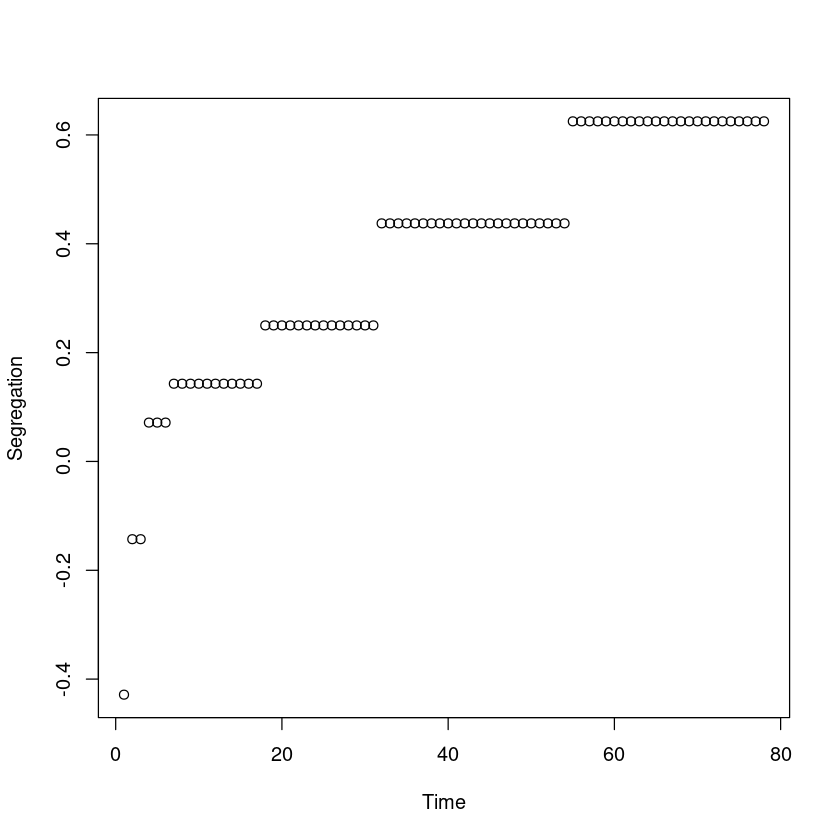

In [11]:
plot_seg_meas("ABAB__AABBA__B_A_BBA_AB", b_in=1, b_out=0)

**Question 7. Write a line of code to plot how segregation in the previous city would evolve if we change the `b_out` parameter to -1. What is similar and different about these two graphs (hint: compare the segregation level at some intermediate points like 20 and 40 and then at the end)**

In [ ]:
# Code for Question 7

*Words for Question 7*

Now let's try some more radical changes to the preference parameters. We can also model the opposite preferences by modifing the `b_in` and `b_out` parameters. 

**Quesiton 8. Write a line of code to show that if the households dislike having ingroup neighbors and like outgroup neighbors, an initial arrangment of "AAAA_BBBB" will become integrated. Use the `shorten=TRUE` argument to keep things concise.**

In [12]:
# Code for question 8 here

**Question 9. Write a line of code to plot how segregation evolves over time in this example (hint: don't include the `shorten=TRUE` argument)**

In [38]:
# Code for question 9 here

Another "unusual" preference we could give the households is to set `b_home=-0.01`, which will make them prefer to move if there is an empty house that is equally good on other dimensions. (Think about why!)

Let's see what happens if we run that on our first example.

In [13]:
display_schelling("ABABABAB_", b_home=-.01, shorten=TRUE)

,Choice,Outcome
,<chr>,<chr>
1,Start,ABABABAB_
2,the A in slot 1 moves to 9,_BABABABA
4,the B in slot 2 moves to 1,B_ABABABA
5,the B in slot 1 moves to 2,_BABABABA
7,the B in slot 2 moves to 1,B_ABABABA
8,the B in slot 1 moves to 2,_BABABABA
10,the B in slot 2 moves to 1,B_ABABABA
11,the B in slot 1 moves to 2,_BABABABA
13,the B in slot 2 moves to 1,B_ABABABA


**Question 10. In words, what happened in this simulation and why? (Hint: as we will show in the next example, the algorithm is set to "stop" after 100 potential moves even if not everyone doesn't want to move)**

*Answer to Question 10*

As we showed in the previous example, sometimes this algorithm will never stop! The way we deal with this in the code is by setting a maximum number of steps to try. The default of this argument is `max_steps=100`. 

**Question 11. Run the simulation for question 6 but set it so it stops running after 20 steps.**

In [39]:
# Code for Question 11

,Choice,Outcome
,<chr>,<chr>
1,Start,ABABABAB_
2,the A in slot 1 moves to 9,_BABABABA
4,the B in slot 2 moves to 1,B_ABABABA
5,the B in slot 1 moves to 2,_BABABABA
7,the B in slot 2 moves to 1,B_ABABABA
8,the B in slot 1 moves to 2,_BABABABA
10,the B in slot 2 moves to 1,B_ABABABA
11,the B in slot 1 moves to 2,_BABABABA
13,the B in slot 2 moves to 1,B_ABABABA


The last thing we will explore is what happens if there are more than two groups. We can do this my adding some additional letters into the mix. For constency, let's call the new groups C and D. Here is an initial arrangement with four groups:

In [14]:
init_four="ACABC_CD_ABBD"
init_four

[1] "ACABC_CD_ABBD"

Here is what happens with our default preferences (liking being close to the in-group, no antipathy towards any out-group). Note that now we have defined `init_four`, we can just use this as our `init=` argument.

In [15]:
display_schelling(init=init_four, shorten=TRUE)

,Choice,Outcome
,<chr>,<chr>
1,Start,ACABC_CD_ABBD
2,the A in slot 1 moves to 9,_CABC_CDAABBD
4,the C in slot 2 moves to 6,__ABCCCDAABBD


**Question 12. Try a few variants of the simiulation with four groups (e.g., change the intial arrangment a bit, or change the `b_in` or `b_out` parameters). Does this lead to more or less segregation? Remember to use the `seg_meas` function to measure segration level.**

In [29]:
# Code for question 12

*Answer to Question 12*

**Question 13. Recall that our key principles for good theory is that we want to simplify the world in a way that allows us to capture key features of the question we are studying. What is a question you might want to ask related to segregation which is NOT well-suited to the algorithm here? How might we modify the model here in order to answer that question?**

*Answer to Question 13*